In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 多项式曲线拟合
假设我们观察到一个实值输入变量$x$，我们希望使用这个观测值去预测一个实值目标变量$t$。本示例的数据由函数$\sin {2\pi x}$生成，生成的目标值中包含随机噪声。现在假设数据集$\mathbf{x}  = \{x_1, \dots, x_N\}^T$，和相应的观测值$t$，表示为$\mathbf{t} = (t_1, \dots, t_N)^T$，下图展示了训练集的曲线图，包括了$N=10$个数据点

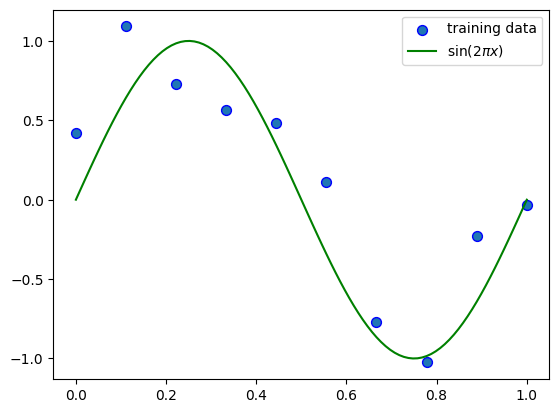

In [ ]:
def create_data(func, std, size):
    #训练数据
    x = np.linspace(0, 1, size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)

    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_data(func, 0.25, 10)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, edgecolors='b', s=50,  label='training data')
plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
plt.legend()
plt.show()



我们使用如下多项式
$$
y(x, \mathbf{w})=w_0 + w_1x +w_2x^2+\dots+w_Mx^M=\sum_{j=0}^Mw_jx^j
$$
其中M是多项式的阶数，可以注意到多项式是$w$的线性函数，不是$x$的，系数的值将通过多项式拟合到训练数据。这可以通过最小化误差函数完成，其中一种被广泛运用的就是均方误差
$$
E(\mathbf{w})=\frac{1}{2} \sum_{n=1}^N \{y(x_n,\mathbf{w} )-t_n\}^2
$$
我们可以通过选择是的$E(\mathbf{w})$尽可能小的$\mathbf{w}$的值来解决曲线拟合问题，因为误差函数是系数$\mathbf{w}$的二次函数，其关于系数的导数和$\mathbf{w}$呈线性关系，所以最小化误差方程有一个唯一解，用$\mathbf{w}^\star$表示